# Modeling

## Exercises

Do your work for this exercise in a jupyter notebook named modeling within the regression-exercises repo. Add, commit, and push your work.

## Imports

In [1]:
# Standard imports
import numpy as np
import pandas as pd

# My imports
import wrangle as w
import explore as e

from pydataset import data

import matplotlib.pyplot as plt
import seaborn as sns

# Stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Select a dataset with a continuous target variable.

In [2]:
df, prep_df = w.get_zillow_data()

csv file found and loaded


### 3. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [3]:
df

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
4,4.0,2.0,3633,296425.0,2005,6941.39,LA
6,3.0,4.0,1620,847770.0,2011,10244.94,LA
7,3.0,2.0,2077,646760.0,1926,7924.68,LA
11,0.0,0.0,1200,5328.0,1972,91.60,LA
14,0.0,0.0,171,6920.0,1973,255.17,LA
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375,422400.0,2015,13877.56,LA
2152858,4.0,3.0,2262,960756.0,2015,13494.52,Orange
2152859,4.0,4.5,3127,536061.0,2014,6244.16,Orange
2152861,3.0,2.5,1974,424353.0,2015,5302.70,Orange


In [4]:
w.get_object_cols(df)

['county']

In [5]:
w.get_numeric_cols(df)

['bedrooms', 'bathrooms', 'area', 'property_value', 'yearbuilt', 'taxamount']

In [6]:
dummy_tips = pd.get_dummies(df[['county']], dummy_na=False, drop_first=[True, True])
df = pd.concat([df, dummy_tips], axis=1)

In [7]:
df = df.drop(columns =['county','taxamount'])

In [8]:
df

,bedrooms,bathrooms,area,property_value,yearbuilt,county_Orange,county_Ventura
4,4.0,2.0,3633,296425.0,2005,0,0
6,3.0,4.0,1620,847770.0,2011,0,0
7,3.0,2.0,2077,646760.0,1926,0,0
11,0.0,0.0,1200,5328.0,1972,0,0
14,0.0,0.0,171,6920.0,1973,0,0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375,422400.0,2015,0,0
2152858,4.0,3.0,2262,960756.0,2015,1,0
2152859,4.0,4.5,3127,536061.0,2014,1,0
2152861,3.0,2.5,1974,424353.0,2015,1,0


In [9]:
train, validate, test = w.get_split(df)

In [10]:
train.shape, validate.shape, test.shape

((1220434, 7), (406812, 7), (406812, 7))

In [11]:
X_train, y_train = train.drop(columns=['property_value']), train.property_value
X_validate, y_validate = validate.drop(columns=['property_value']), validate.property_value
X_test, y_test = test.drop(columns=['property_value']), test.property_value

In [12]:
to_scale = X_train.columns.tolist()

In [13]:
X_train_scaled, X_validate_scaled, X_test_scaled = w.scale_data(X_train,X_validate,X_test,to_scale)
X_train_scaled

,bedrooms,bathrooms,area,yearbuilt,county_Orange,county_Ventura
1196984,0.200000,0.050,0.042735,0.679070,0.0,0.0
1563409,0.200000,0.100,0.077501,0.734884,0.0,0.0
486661,0.200000,0.150,0.100293,0.767442,0.0,0.0
328430,0.200000,0.100,0.066229,0.660465,0.0,0.0
654871,0.400000,0.150,0.111441,0.851163,1.0,0.0
...,...,...,...,...,...,...
225651,0.200000,0.150,0.094471,0.934884,1.0,0.0
741819,0.266667,0.150,0.117098,0.795349,1.0,0.0
1989492,0.200000,0.125,0.060325,0.813953,1.0,0.0
662013,0.133333,0.100,0.049135,0.688372,0.0,0.0


In [14]:
baseline = y_train.mean()
baseline

363708.5960109273

In [15]:
#make an array to send into my mean_square_error function
baseline_array = np.repeat(baseline, len(train))

In [16]:
rmse, r2 = w.metrics_reg(y_train, baseline_array)
rmse, r2

(243873.34821247822, 0.0)

In [17]:
metrics_df = pd.DataFrame(data=[
    {
        'model':'baseline',
        'rmse':rmse,
        'r2':r2
    }
    
])
metrics_df

,model,rmse,r2
0,baseline,243873.348212,0.0


## Ordinary Least Squares (OLS)

OLS is our standard linear regression algorithm and is computed by minimizing the sum of squared differences in the linear model (residual) with the actual data points

In [18]:
# USE THIS ONE to find the best features for RFE
top_k_rfe, X_train_rfe, X_val_rfe = w.rfe(X_train_scaled,X_validate_scaled, y_train,3)
top_k_rfe

Index(['bedrooms', 'bathrooms', 'area'], dtype='object')

In [19]:
#intial ML model
lr = LinearRegression()

#fit the thing
lr.fit(X_train_rfe, y_train)

#use the thing (make predictions)
pred_lr_rfe = lr.predict(X_train_rfe)
pred_val_lr_rfe = lr.predict(X_val_rfe)

### Evaluate

In [20]:
#train
w.metrics_reg(y_train, pred_lr_rfe)

(205757.26514939603, 0.28816116793685653)

In [21]:
#validate
rmse, r2 = w.metrics_reg(y_validate, pred_val_lr_rfe)
rmse, r2

(205609.31286121745, 0.2876171907284557)

In [22]:
#add to my metrics df
metrics_df.loc[1] = ['ols+RFE', rmse, r2]
metrics_df

,model,rmse,r2
0,baseline,243873.348212,0.000000
1,ols+RFE,205609.312861,0.287617


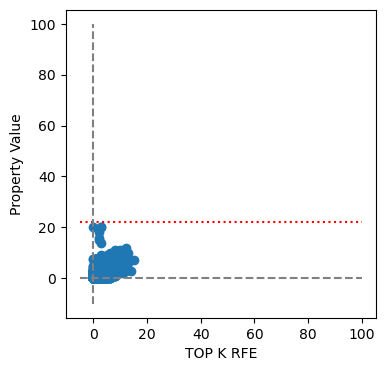

In [54]:
plt.figure(figsize=(4, 4))

plt.scatter(train.bedrooms,train.bathrooms)

# # build prediction line from intercept and slope
# x_val = np.array([-2, 100]).reshape(-1, 1)
# plt.plot(x_val, lr.intercept_ + x_val*lr.coef_[0], c='black')

#intercept line
plt.hlines(22, -5, 100, ls=':', color='red')  

#(0,0) axis
plt.hlines(0, -5, 100, ls='--', color='grey')
plt.vlines(0, -10, 100, ls='--', color='grey')

plt.xlabel('TOP K RFE')
plt.ylabel('Property Value')
plt.show()

## Multiple Regression

In [24]:
#make it
lr = LinearRegression()

#fit it on our RFE features
lr.fit(X_train_scaled, y_train)

#use it (make predictions)
pred_lr = lr.predict(X_train_scaled)

#use it on validate
pred_val_lr = lr.predict(X_validate_scaled)

### Evaluate

In [25]:
#train 
w.metrics_reg(y_train, pred_lr)

(204798.0611793916, 0.29478263124222026)

In [26]:
#validate
rmse, r2 = w.metrics_reg(y_validate, pred_val_lr)
rmse, r2

(204655.28153699063, 0.29421279424717317)

In [27]:
#add to my metrics df
metrics_df.loc[2] = ['ols', rmse, r2]
metrics_df

,model,rmse,r2
0,baseline,243873.348212,0.000000
1,ols+RFE,205609.312861,0.287617
2,ols,204655.281537,0.294213


## LassoLars

In [28]:
# alpha = 10, identical to OLS

#make it
lars = LassoLars(alpha=1)

#fit it
lars.fit(X_train_scaled, y_train)

#use it
pred_lars = lars.predict(X_train_scaled)
pred_val_lars = lars.predict(X_validate_scaled)

### Evaluate

In [29]:
#train
w.metrics_reg(y_train, pred_lars)

(204823.82548919096, 0.294605182475867)

In [30]:
#validate
rmse, r2 = w.metrics_reg(y_validate, pred_val_lars)
rmse, r2

(204678.7756024841, 0.29405073869216203)

In [31]:
#add to my metrics df
metrics_df.loc[3] = ['lars', rmse, r2]
metrics_df

,model,rmse,r2
0,baseline,243873.348212,0.000000
1,ols+RFE,205609.312861,0.287617
2,ols,204655.281537,0.294213
3,lars,204678.775602,0.294051


## Polynomial Regression

In [32]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [33]:
#make it
pr = LinearRegression()

#fit it
pr.fit(X_train_degree2, y_train)

#use it
pred_pr = pr.predict(X_train_degree2)
pred_val_pr = pr.predict(X_validate_degree2)

### Evaluate

In [34]:
#train
w.metrics_reg(y_train, pred_pr)

(201121.0255158603, 0.31987886974762325)

In [35]:
#validate
rmse, r2 = w.metrics_reg(y_validate, pred_val_pr)
rmse, r2

(201050.28307252887, 0.3188586507762273)

In [36]:
#add to my metrics df
metrics_df.loc[4] = ['poly_2D', rmse, r2]
metrics_df

,model,rmse,r2
0,baseline,243873.348212,0.000000
1,ols+RFE,205609.312861,0.287617
2,ols,204655.281537,0.294213
3,lars,204678.775602,0.294051
4,poly_2D,201050.283073,0.318859


## Generalized Linear Model (GLM)

In [37]:
#make it
glm = TweedieRegressor(power=1, alpha=0)

#fit it
glm.fit(X_train_scaled, y_train)

#use it
pred_glm = glm.predict(X_train_scaled)
pred_val_glm = glm.predict(X_validate_scaled)

In [38]:
#train
w.metrics_reg(y_train, pred_glm)

(243886.333538832, -0.00010649521285155394)

In [39]:
#validate
rmse, r2 = w.metrics_reg(y_validate, pred_val_glm)
rmse, r2

(264400.0018724078, -0.17801487724541332)

In [40]:
metrics_df.loc[5] = ['glm',rmse,r2]
metrics_df

,model,rmse,r2
0,baseline,243873.348212,0.000000
1,ols+RFE,205609.312861,0.287617
2,ols,204655.281537,0.294213
3,lars,204678.775602,0.294051
4,poly_2D,201050.283073,0.318859
5,glm,264400.001872,-0.178015


## Evaluate on BEST MODEL

In [41]:
#use it
pred_test = pr.predict(X_test_degree2)

In [42]:
rmse, r2 = w.metrics_reg(y_test, pred_test)
rmse, r2

(201347.49732441088, 0.31954160992603986)

In [43]:
metrics_df.loc[6] = ['test',rmse,r2]
metrics_df

,model,rmse,r2
0,baseline,243873.348212,0.000000
1,ols+RFE,205609.312861,0.287617
2,ols,204655.281537,0.294213
3,lars,204678.775602,0.294051
4,poly_2D,201050.283073,0.318859
5,glm,264400.001872,-0.178015
6,test,201347.497324,0.319542


In [44]:
X_train

,bedrooms,bathrooms,area,yearbuilt,county_Orange,county_Ventura
1196984,3.0,1.0,1036,1947,0,0
1563409,3.0,2.0,1878,1959,0,0
486661,3.0,3.0,2430,1966,0,0
328430,3.0,2.0,1605,1943,0,0
654871,6.0,3.0,2700,1984,1,0
...,...,...,...,...,...,...
225651,3.0,3.0,2289,2002,1,0
741819,4.0,3.0,2837,1972,1,0
1989492,3.0,2.5,1462,1976,1,0
662013,2.0,2.0,1191,1949,0,0


### plot actuals vs predicted

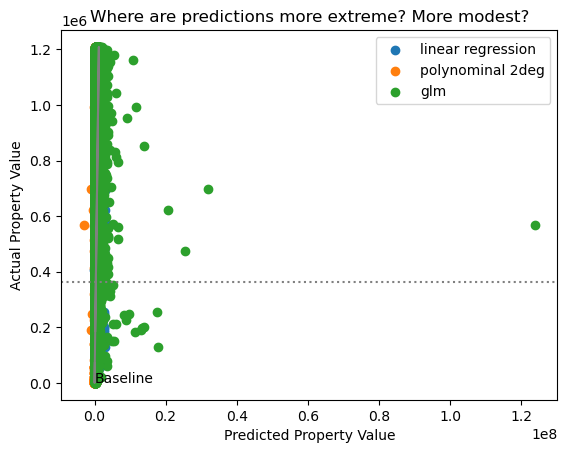

In [45]:
plt.scatter(pred_lr, y_train, label='linear regression')
plt.scatter(pred_pr, y_train, label='polynominal 2deg')
plt.scatter(pred_glm, y_train, label='glm')
plt.plot(y_train, y_train, label='_nolegend_', color='grey')

plt.axhline(baseline, ls=':', color='grey')
plt.annotate("Baseline", (65, 81))

plt.title("Where are predictions more extreme? More modest?")
plt.ylabel("Actual Property Value")
plt.xlabel("Predicted Property Value")
plt.legend()

plt.show()

### plotting the residuals

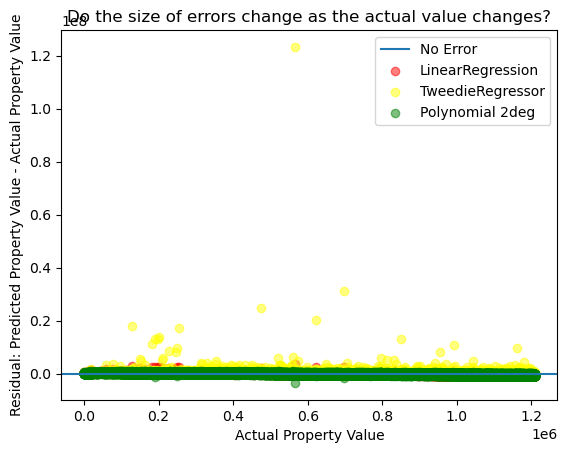

In [46]:
plt.axhline(label="No Error")

plt.scatter(y_train, pred_lr - y_train, alpha=.5, color="red", label="LinearRegression")
plt.scatter(y_train, pred_glm - y_train, alpha=.5, color="yellow", label="TweedieRegressor")
plt.scatter(y_train, pred_pr - y_train, alpha=.5, color="green", label="Polynomial 2deg ")

plt.legend()
plt.title("Do the size of errors change as the actual value changes?")
plt.xlabel("Actual Property Value")
plt.ylabel("Residual: Predicted Property Value - Actual Property Value")

plt.show()

### histogram of actual and predicted values

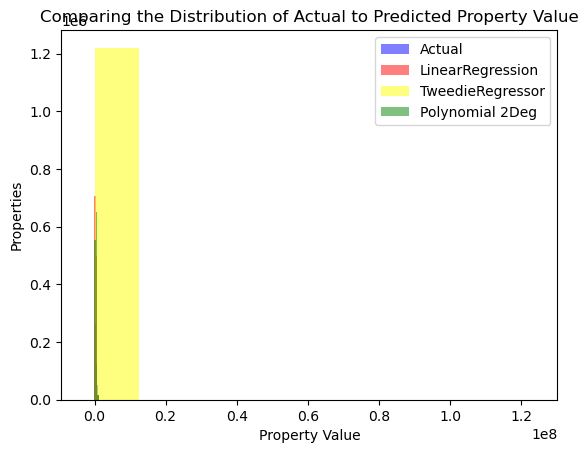

In [47]:
plt.hist(y_train, color='blue', alpha=.5, label="Actual")
plt.hist(pred_lr, color='red', alpha=.5, label="LinearRegression")
plt.hist(pred_glm, color='yellow', alpha=.5, label="TweedieRegressor")
plt.hist(pred_pr, color='green', alpha=.5, label="Polynomial 2Deg")

plt.xlabel("Property Value")
plt.ylabel("Properties")
plt.title("Comparing the Distribution of Actual to Predicted Property Value")
plt.legend()
plt.show()